CẮT DỮ LIỆU

In [1]:
import pandas as pd
import numpy as np

INPUT_PATH  = "/kaggle/input/final-nlp-dataset/data.json"   
OUTPUT_PATH = "/kaggle/working/datanew.json"
N_TARGET    = 50_000
RNG_SEED    = 42

df = pd.read_json(INPUT_PATH)[["content", "label"]].dropna()
df["content"] = df["content"].astype(str).str.strip()
df["label"]   = df["label"].astype(str).str.strip()
df = df[df["content"].str.len() > 0].drop_duplicates(subset=["content"]).reset_index(drop=True)
print(f"Loaded: {len(df):,} samples, {df['label'].nunique()} labels")

label_order = df["label"].drop_duplicates().tolist()

prop = df["label"].value_counts(normalize=True)          
raw_counts = prop * N_TARGET
counts = np.floor(raw_counts).astype(int)
short = N_TARGET - counts.sum()
if short > 0:
    remainders = (raw_counts - counts).sort_values(ascending=False)
    counts.loc[remainders.index[:short]] += 1
assert counts.sum() == N_TARGET

parts = []
rng = np.random.default_rng(RNG_SEED)
for lb in label_order:
    n = int(counts.get(lb, 0))
    if n <= 0: 
        continue
    g = df[df["label"] == lb]
    n = min(n, len(g))
    parts.append(g.sample(n=n, random_state=int(rng.integers(1_000_000_000))))
df_sampled = pd.concat(parts, ignore_index=True).sample(frac=1.0, random_state=RNG_SEED).reset_index(drop=True)

print(f" Sampled: {len(df_sampled):,} samples ({df_sampled['label'].nunique()} labels)")

cat = pd.api.types.CategoricalDtype(categories=label_order, ordered=True)
df["label"]        = df["label"].astype(cat)
df_sampled["label"] = df_sampled["label"].astype(cat)

orig_cnt = df["label"].value_counts(sort=False)
orig_pct = (df["label"].value_counts(normalize=True, sort=False)*100).round(2)
new_cnt  = df_sampled["label"].value_counts(sort=False)
new_pct  = (df_sampled["label"].value_counts(normalize=True, sort=False)*100).round(2)

report = pd.DataFrame({
    "orig_count": orig_cnt,
    "orig_%":     orig_pct,
    "new_count":  new_cnt,
    "new_%":      new_pct
}).astype({"orig_count": int, "new_count": int})

print(report.to_string())

df_sampled.to_json(OUTPUT_PATH, orient="records", lines=False, force_ascii=False)
print(f"\n Saved → {OUTPUT_PATH}")

📥 Loaded: 591,293 samples, 21 labels
 Sampled: 50,000 samples (21 labels)
                   orig_count  orig_%  new_count  new_%
label                                                  
Thể thao                41994    7.10       3551   7.10
Ý kiến                  10036    1.70        849   1.70
Ngôi Sao               113964   19.27       9637  19.27
Khoa học                20356    3.44       1721   3.44
Kinh doanh              39951    6.76       3378   6.76
Pháp luật               20793    3.52       1758   3.52
Thế giới                56885    9.62       4810   9.62
Thời sự                 30376    5.14       2569   5.14
Giải trí giới trẻ       44724    7.56       3782   7.56
Số hóa                  19843    3.36       1678   3.36
Giải trí                29360    4.97       2483   4.97
Tâm sự                  23572    3.99       1993   3.99
Sức khỏe                38425    6.50       3249   6.50
Giáo dục                19363    3.27       1637   3.27
Xe                      17190 

TRỰC QUAN HÓA DỮ LIỆU

=== THÔNG TIN CLEAN NHẸ ===
ORIG: {'missing_before': {'content': 0, 'label': 0}, 'dup_before': 0, 'n_samples': 50000, 'n_labels': 21}
SYN : {'missing_before': {'content': 0, 'label': 0}, 'dup_before': 0, 'n_samples': 63001, 'n_labels': 21}

=== THỐNG KÊ TỔNG QUÁT ===
ORIG: 50000 mẫu, 21 nhãn
SYN : 63001 mẫu, 21 nhãn

PHÂN BỐ NHÃN (TOP theo SYN):
                   count_orig  pct_orig  count_syn    pct_syn  delta_pct
label                                                                   
Ngôi Sao                 9637    19.274       9637  15.296583      -3.98
Thế giới                 4810     9.620       4810   7.634799      -1.99
Giải trí giới trẻ        3782     7.564       3782   6.003079      -1.56
Thể thao                 3551     7.102       3551   5.636418      -1.47
Kinh doanh               3378     6.756       3378   5.361820      -1.39
Sức khỏe                 3249     6.498       3249   5.157061      -1.34
Bất động sản              974     1.948       3089   4.903097       

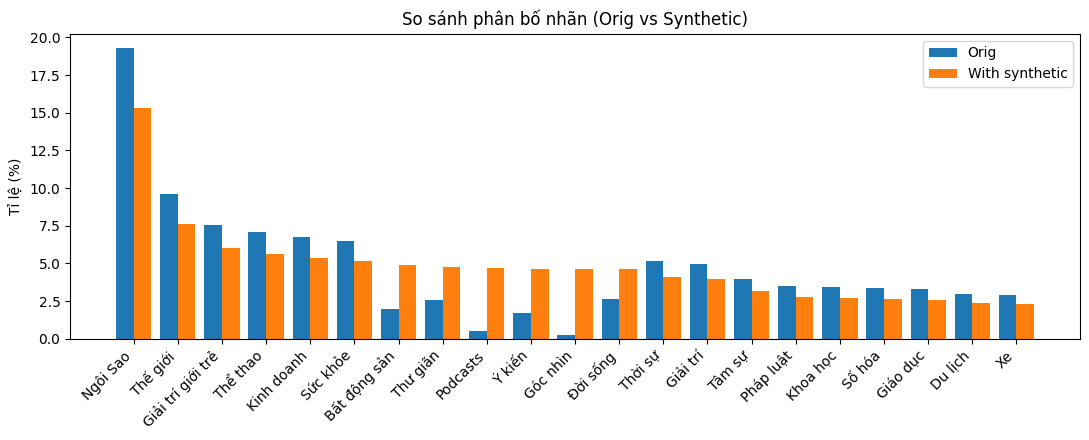


=== TÓM TẮT ĐỘ DÀI VĂN BẢN (chars / words) ===
           char_len_mean  char_len_median  char_len_p95  word_len_mean  \
orig              2309.7           1935.0        5651.0          502.7   
synthetic         2220.3           1948.0        5296.0          484.4   

           word_len_median  word_len_p95  
orig                 419.0        1234.0  
synthetic            423.0        1158.0  


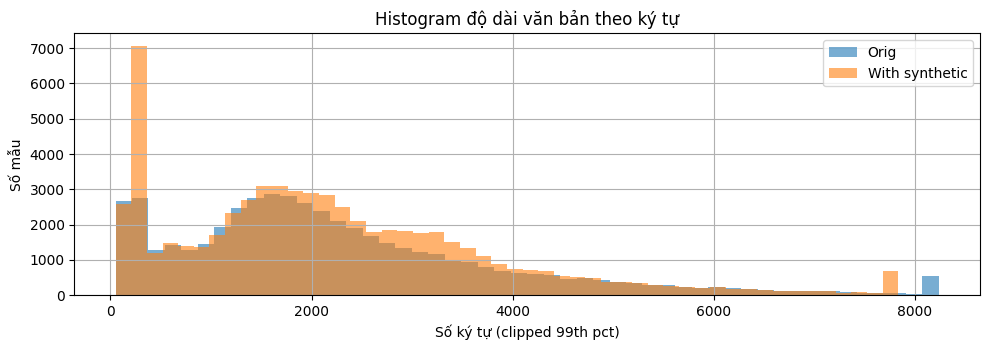

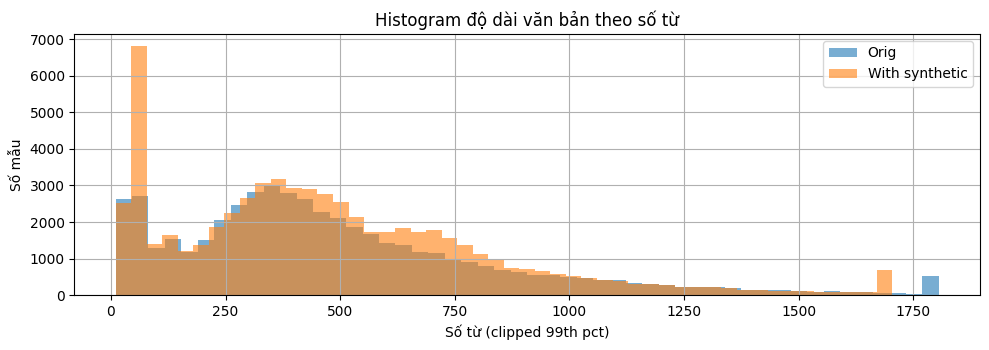


=== TRUNG BÌNH THEO NHÃN (chars / words) ===
                   samples_orig  avg_chars_orig  avg_words_orig  samples_syn  \
label                                                                          
Ngôi Sao                   9637          1945.8           426.6         9637   
Thế giới                   4810          2508.8           538.4         4810   
Giải trí giới trẻ          3782          1869.2           405.9         3782   
Thể thao                   3551          2248.0           477.4         3551   
Kinh doanh                 3378          2974.0           641.4         3378   
Sức khỏe                   3249          2774.9           603.3         3249   
Bất động sản                974          3599.8           789.4         3089   
Thư giãn                   1300           321.7            71.6         3000   
Podcasts                    250           259.2            51.1         2950   
Ý kiến                      849          3376.7           755.5         29

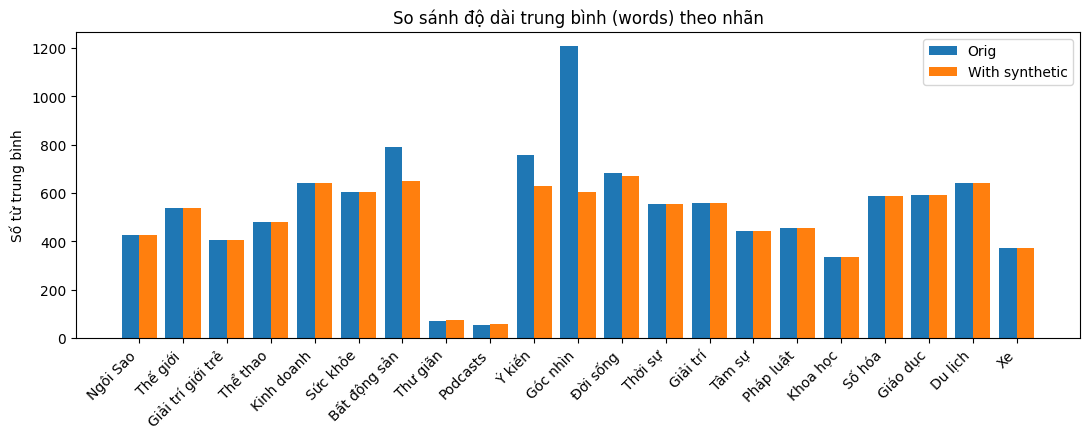

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

PATH_ORIG = "/kaggle/input/nlp-datanew/datanew.json"
PATH_SYN  = "/kaggle/input/datanew-synthetic/datanew_synthetic.json"

TOPK = 21   

#  HÀM TIỆN ÍCH 
def load_and_clean(path):
    raw = pd.read_json(path)[["content", "label"]]
    missing_before = raw.isna().sum()
    dup_before = raw.duplicated(subset=["content"]).sum()

    df = (
        raw.dropna(subset=["content", "label"])
           .assign(
               content=lambda d: d["content"].astype(str).str.strip(),
               label=lambda d: d["label"].astype(str).str.strip()
           )
    )
    df = df[df["content"].str.len() > 0].drop_duplicates(subset=["content"]).reset_index(drop=True)

    info = {
        "missing_before": missing_before.to_dict(),
        "dup_before": int(dup_before),
        "n_samples": len(df),
        "n_labels": df["label"].nunique(),
    }
    return df, info


def add_length_features(df):
    df = df.copy()
    df["char_len"] = df["content"].str.len()
    df["word_len"] = df["content"].str.split().str.len()
    return df


def length_summary(df, name="dataset"):
    out = {}
    for col in ["char_len", "word_len"]:
        out[f"{col}_mean"]   = df[col].mean()
        out[f"{col}_median"] = df[col].median()
        out[f"{col}_p95"]    = df[col].quantile(0.95)
    return pd.Series(out, name=name)


#  LOAD & CLEAN NHẸ 
df_orig, info_orig = load_and_clean(PATH_ORIG)
df_syn,  info_syn  = load_and_clean(PATH_SYN)

print("=== THÔNG TIN CLEAN NHẸ ===")
print("ORIG:", info_orig)
print("SYN :", info_syn)

# Thêm feature độ dài
df_orig = add_length_features(df_orig)
df_syn  = add_length_features(df_syn)

#  THỐNG KÊ TỔNG QUÁT 
print("\n=== THỐNG KÊ TỔNG QUÁT ===")
print(f"ORIG: {len(df_orig)} mẫu, {df_orig['label'].nunique()} nhãn")
print(f"SYN : {len(df_syn)} mẫu, {df_syn['label'].nunique()} nhãn")

# Phân bố nhãn (count + %)
dist_orig = df_orig["label"].value_counts().rename_axis("label").to_frame("count_orig")
dist_orig["pct_orig"] = dist_orig["count_orig"] / len(df_orig) * 100

dist_syn = df_syn["label"].value_counts().rename_axis("label").to_frame("count_syn")
dist_syn["pct_syn"] = dist_syn["count_syn"] / len(df_syn) * 100

label_dist = dist_orig.join(dist_syn, how="outer").fillna(0)
label_dist["count_orig"] = label_dist["count_orig"].astype(int)
label_dist["count_syn"]  = label_dist["count_syn"].astype(int)
label_dist["delta_pct"]  = (label_dist["pct_syn"] - label_dist["pct_orig"]).round(2)

print("\nPHÂN BỐ NHÃN (TOP theo SYN):")
print(label_dist.sort_values("count_syn", ascending=False).head(TOPK))

# Biểu đồ so sánh phân bố nhãn (%)
label_sorted = label_dist.sort_values("pct_syn", ascending=False)
labels = label_sorted.index.tolist()

x = range(len(labels))
plt.figure(figsize=(11, 4.5))
plt.bar([i - 0.2 for i in x], label_sorted["pct_orig"], width=0.4, label="Orig")
plt.bar([i + 0.2 for i in x], label_sorted["pct_syn"],  width=0.4, label="With synthetic")
plt.xticks(x, labels, rotation=45, ha="right")
plt.ylabel("Tỉ lệ (%)")
plt.title("So sánh phân bố nhãn (Orig vs Synthetic)")
plt.legend()
plt.tight_layout()
plt.show()

#  ĐỘ DÀI VĂN BẢN 
summary_orig = length_summary(df_orig, name="orig")
summary_syn  = length_summary(df_syn,  name="synthetic")
len_summary = pd.concat([summary_orig, summary_syn], axis=1).T

print("\n=== TÓM TẮT ĐỘ DÀI VĂN BẢN (chars / words) ===")
print(len_summary.round(1))

# Histogram độ dài (chars)
plt.figure(figsize=(10, 3.6))
df_orig["char_len"].clip(upper=df_orig["char_len"].quantile(0.99)).hist(
    bins=50, alpha=0.6, label="Orig"
)
df_syn["char_len"].clip(upper=df_syn["char_len"].quantile(0.99)).hist(
    bins=50, alpha=0.6, label="With synthetic"
)
plt.xlabel("Số ký tự (clipped 99th pct)")
plt.ylabel("Số mẫu")
plt.title("Histogram độ dài văn bản theo ký tự")
plt.legend()
plt.tight_layout()
plt.show()

# Histogram độ dài (words)
plt.figure(figsize=(10, 3.6))
df_orig["word_len"].clip(upper=df_orig["word_len"].quantile(0.99)).hist(
    bins=50, alpha=0.6, label="Orig"
)
df_syn["word_len"].clip(upper=df_syn["word_len"].quantile(0.99)).hist(
    bins=50, alpha=0.6, label="With synthetic"
)
plt.xlabel("Số từ (clipped 99th pct)")
plt.ylabel("Số mẫu")
plt.title("Histogram độ dài văn bản theo số từ")
plt.legend()
plt.tight_layout()
plt.show()

#  TRUNG BÌNH THEO NHÃN 
per_label_orig = (
    df_orig.groupby("label")
          .agg(
              samples_orig=("content", "count"),
              avg_chars_orig=("char_len", "mean"),
              avg_words_orig=("word_len", "mean"),
          )
)

per_label_syn = (
    df_syn.groupby("label")
         .agg(
             samples_syn=("content", "count"),
             avg_chars_syn=("char_len", "mean"),
             avg_words_syn=("word_len", "mean"),
         )
)

per_label_cmp = (
    per_label_orig.join(per_label_syn, how="outer")
                  .fillna(0)
)

# Làm tròn cho dễ nhìn
for c in ["avg_chars_orig", "avg_words_orig", "avg_chars_syn", "avg_words_syn"]:
    per_label_cmp[c] = per_label_cmp[c].round(1)

per_label_cmp["delta_words"] = (per_label_cmp["avg_words_syn"] -
                                per_label_cmp["avg_words_orig"]).round(1)

print("\n=== TRUNG BÌNH THEO NHÃN (chars / words) ===")
print(per_label_cmp.sort_values("samples_syn", ascending=False).head(TOPK))

# Vẽ so sánh độ dài trung bình theo nhãn (words)
top_labels = per_label_cmp.sort_values("samples_syn", ascending=False).head(TOPK)
x = range(len(top_labels))

plt.figure(figsize=(11, 4.5))
plt.bar([i - 0.2 for i in x], top_labels["avg_words_orig"], width=0.4, label="Orig")
plt.bar([i + 0.2 for i in x], top_labels["avg_words_syn"],  width=0.4, label="With synthetic")
plt.xticks(x, top_labels.index, rotation=45, ha="right")
plt.ylabel("Số từ trung bình")
plt.title("So sánh độ dài trung bình (words) theo nhãn")
plt.legend()
plt.tight_layout()
plt.show()

TIỀN XỬ LÝ CƠ BẢN BỘ DATA KHÔNG THÊM SYNTHETIC

In [3]:
!pip -q install emoji==2.14.0 transformers==4.44.2 pyvi==0.1.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 111.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 94.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 87.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.5 MB/s eta 0:00:00


In [4]:
import os, re, json, unicodedata, random, sys
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import numpy as np
from pyvi import ViTokenizer  

SEED = 42
random.seed(SEED); np.random.seed(SEED)

#  PATH CHO 2 BỘ DỮ LIỆU 
DATA_PATH_ORIG = "/kaggle/input/nlp-datanew/datanew.json"                
DATA_PATH_SYN  = "/kaggle/input/datanew-synthetic/datanew_synthetic.json"  

SAVE_DIR_ORIG = "/kaggle/working/preprocessed_phobert_orig"
SAVE_DIR_SYN  = "/kaggle/working/preprocessed_phobert_synthetic"

os.makedirs(SAVE_DIR_ORIG, exist_ok=True)
os.makedirs(SAVE_DIR_SYN,  exist_ok=True)

In [5]:
import json, re, unicodedata
import pandas as pd
from pathlib import Path
from pyvi import ViTokenizer
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

tqdm.pandas(desc="progress")


# ========= HÀM PHỤ: chọn cột content/label & đọc JSON bất kỳ =========
def _pick_cols(df):
    cols_lower = {c.lower().strip(): c for c in df.columns}
    def find(cands):
        for c in cands:
            if c in cols_lower: 
                return cols_lower[c]
        return None
    c = find(["content","text","body","article","document"])
    l = find(["label","category","topic","class","tag"])
    if c and l:
        return df[[c,l]].rename(columns={c:"content", l:"label"})
    return None


def read_json_any(path):
    # JSON lines
    try:
        df = pd.read_json(path, lines=True)
        picked = _pick_cols(df)
        if picked is not None: 
            return picked
    except Exception:
        pass
    # JSON array / object đơn giản
    try:
        df = pd.read_json(path)
        picked = _pick_cols(df)
        if picked is not None: 
            return picked
    except Exception:
        pass
    # Bọc trong data/items/records/rows
    with open(path, "r", encoding="utf-8") as f:
        raw = json.load(f)
    if isinstance(raw, dict):
        for k in ["data","items","records","rows"]:
            if k in raw and isinstance(raw[k], list):
                df = pd.DataFrame(raw[k])
                picked = _pick_cols(df)
                if picked is not None: 
                    return picked
    if isinstance(raw, list):
        df = pd.DataFrame(raw)
        picked = _pick_cols(df)
        if picked is not None: 
            return picked
    raise ValueError("Không tìm được cột content/label trong JSON.")


#  HÀM CLEAN TEXT 
URL_RE   = re.compile(r"https?://\S+|www\.\S+", re.IGNORECASE)
EMAIL_RE = re.compile(r"\b[\w\.-]+@[\w\.-]+\.\w+\b")
USER_RE  = re.compile(r"[@#]\w+")
MULTI_WS = re.compile(r"\s+")
DUP_PUN  = re.compile(r"([!?.,;:])\1+")
BRACKETS = re.compile(r"\{[^{}]*\}|\[[^\[\]]*\]|\([^()]*\)")

def normalize_unicode(s: str) -> str:
    return unicodedata.normalize("NFC", s)

def clean_text(s: str) -> str:
    s = normalize_unicode(str(s).strip())
    s = s.replace("\u00A0"," ")
    s = URL_RE.sub(" ", s)
    s = EMAIL_RE.sub(" ", s)
    s = USER_RE.sub(" ", s)
    s = BRACKETS.sub(" ", s)
    s = DUP_PUN.sub(r"\1", s)
    s = s.lower()
    s = MULTI_WS.sub(" ", s).strip()
    return s


#  HÀM SEGMENT TIẾNG VIỆT 
def segment_vi(text: str) -> str:
    return ViTokenizer.tokenize(text)  # ghép từ bằng dấu '_'


#  TOÀN BỘ PIPELINE CHO 1 BỘ DỮ LIỆU 
def preprocess_dataset(data_path, save_dir, seed=42, max_chars=4000, tag=""):
    print(f"\n========== PREPROCESSING {tag} ==========")
    print("Input :", data_path)
    print("Output:", save_dir)

    df = read_json_any(data_path)
    print("Raw loaded:", df.shape)

    df = df.dropna(subset=["content","label"]).reset_index(drop=True)

    # Clean text
    df["content"] = df["content"].progress_map(clean_text)
    df["label"]   = df["label"].astype(str).str.strip()
    df = df[(df["content"].str.len() > 0) & (df["label"].str.len() > 0)]
    df = df.drop_duplicates(subset=["content"]).reset_index(drop=True)

    # Cắt bớt văn bản quá dài
    df["content"] = df["content"].str.slice(0, max_chars)

    print("After clean:", df.shape)

    # Word segmentation cho PhoBERT
    tqdm.pandas(desc=f"word_segment {tag}")
    df["text_ws"] = df["content"].progress_map(segment_vi)

    # Mã hoá nhãn
    le = LabelEncoder()
    df["label_id"] = le.fit_transform(df["label"])

    # Chia train/val/test (stratified)
    train_val_df, test_df = train_test_split(
        df,
        test_size=0.1,
        stratify=df["label_id"],
        random_state=seed
    )

    train_df, val_df = train_test_split(
        train_val_df,
        test_size=0.2222,   # ~0.2 tổng data
        stratify=train_val_df["label_id"],
        random_state=seed
    )

    # Lưu dữ liệu & thống kê
    keep = ["text_ws","label_id","label"]
    Path(save_dir).mkdir(parents=True, exist_ok=True)

    train_df[keep].to_parquet(f"{save_dir}/train.parquet", index=False)
    val_df[keep].to_parquet(f"{save_dir}/val.parquet", index=False)
    test_df[keep].to_parquet(f"{save_dir}/test.parquet", index=False)

    id2label = {int(i): l for i, l in enumerate(le.classes_)}
    label2id = {l: int(i) for i, l in id2label.items()}
    with open(f"{save_dir}/labels.json","w",encoding="utf-8") as f:
        json.dump({"id2label": id2label, "label2id": label2id},
                  f, ensure_ascii=False, indent=2)

    label_stats = df["label"].value_counts().rename_axis("label").reset_index(name="count")
    label_stats["ratio"] = (label_stats["count"]/label_stats["count"].sum()).round(6)
    label_stats.to_csv(f"{save_dir}/label_stats.csv", index=False)

    print("\nSaved to:", save_dir)
    print("Train/Val/Test:", train_df.shape, val_df.shape, test_df.shape)
    print("Num labels:", len(le.classes_))
    print(label_stats.head(10))
    print("\nLength (chars) after segmentation:\n",
          train_df["text_ws"].str.len().describe())

    return {
        "df": df,
        "train": train_df,
        "val": val_df,
        "test": test_df,
        "label_encoder": le,
        "label_stats": label_stats,
    }


# CHẠY CHO 2 BỘ DỮ LIỆU 
res_orig = preprocess_dataset(
    DATA_PATH_ORIG,
    SAVE_DIR_ORIG,
    seed=SEED,
    max_chars=4000,
    tag="ORIG"
)

res_syn = preprocess_dataset(
    DATA_PATH_SYN,
    SAVE_DIR_SYN,
    seed=SEED,
    max_chars=4000,
    tag="SYNTHETIC"
)



========== PREPROCESSING ORIG ==========
Input : /kaggle/input/nlp-datanew/datanew.json
Output: /kaggle/working/preprocessed_phobert_orig
Raw loaded: (50000, 2)


progress: 100%|██████████| 50000/50000 [00:21<00:00, 2342.51it/s]


After clean: (49993, 2)


word_segment ORIG: 100%|██████████| 49993/49993 [06:53<00:00, 121.02it/s]



Saved to: /kaggle/working/preprocessed_phobert_orig
Train/Val/Test: (34995, 4) (9998, 4) (5000, 4)
Num labels: 21
               label  count     ratio
0           Ngôi Sao   9635  0.192727
1           Thế giới   4810  0.096213
2  Giải trí giới trẻ   3782  0.075651
3           Thể thao   3551  0.071030
4         Kinh doanh   3378  0.067569
5           Sức khỏe   3249  0.064989
6            Thời sự   2569  0.051387
7           Giải trí   2478  0.049567
8             Tâm sự   1993  0.039866
9          Pháp luật   1758  0.035165

Length (chars) after segmentation:
 count    34995.000000
mean      2102.366652
std       1243.125395
min         53.000000
25%       1187.000000
50%       1954.000000
75%       3071.500000
max       4515.000000
Name: text_ws, dtype: float64

========== PREPROCESSING SYNTHETIC ==========
Input : /kaggle/input/datanew-synthetic/datanew_synthetic.json
Output: /kaggle/working/preprocessed_phobert_synthetic
Raw loaded: (63001, 2)


word_segment ORIG: 100%|██████████| 63001/63001 [00:25<00:00, 2459.17it/s]


After clean: (62994, 2)


word_segment SYNTHETIC: 100%|██████████| 62994/62994 [09:06<00:00, 115.27it/s]



Saved to: /kaggle/working/preprocessed_phobert_synthetic
Train/Val/Test: (44096, 4) (12598, 4) (6300, 4)
Num labels: 21
               label  count     ratio
0           Ngôi Sao   9636  0.152967
1           Thế giới   4810  0.076356
2  Giải trí giới trẻ   3782  0.060037
3           Thể thao   3551  0.056370
4         Kinh doanh   3378  0.053624
5           Sức khỏe   3249  0.051576
6       Bất động sản   3089  0.049036
7           Thư giãn   3000  0.047624
8           Podcasts   2950  0.046830
9             Ý kiến   2938  0.046639

Length (chars) after segmentation:
 count    44096.000000
mean      2061.946662
std       1268.519394
min         53.000000
25%       1067.000000
50%       1972.000000
75%       3095.250000
max       4489.000000
Name: text_ws, dtype: float64


BUILD MODEL FINE TUNE

In [6]:
!pip -q install transformers==4.44.2

In [7]:
import json, pandas as pd
from pathlib import Path
import torch

from transformers import (
    AutoTokenizer, DataCollatorWithPadding,
    AutoModelForSequenceClassification,
    Trainer, TrainingArguments
)

MODEL_NAME   = "vinai/phobert-base"
PP_DIR_ORIG  = Path("/kaggle/working/preprocessed_phobert_orig")
PP_DIR_SYN   = Path("/kaggle/working/preprocessed_phobert_synthetic")

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, use_fast=True)
MAX_LEN = 256

class FrameDataset(torch.utils.data.Dataset):
    def __init__(self, df):
        self.texts  = df["text_ws"].astype(str).tolist()
        self.labels = df["label_id"].astype(int).tolist()
    def __len__(self): return len(self.labels)
    def __getitem__(self, idx):
        enc = tokenizer(self.texts[idx], truncation=True, max_length=MAX_LEN)
        enc["labels"] = self.labels[idx]
        return {k: torch.tensor(v) for k,v in enc.items()}


def load_data(pp_dir: Path):
    train_df = pd.read_parquet(pp_dir/"train.parquet")
    val_df   = pd.read_parquet(pp_dir/"val.parquet")
    with open(pp_dir/"labels.json","r",encoding="utf-8") as f:
        label_maps = json.load(f)
    num_labels = len(label_maps["id2label"])
    id2label = {int(k): v for k, v in label_maps["id2label"].items()}
    label2id = {k: int(v) for k, v in label_maps["label2id"].items()}
    return train_df, val_df, num_labels, id2label, label2id


2025-11-22 05:54:36.355948: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763790876.521970      48 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763790876.578392      48 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

bpe.codes: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [8]:
def train_one_experiment(exp_tag: str, pp_dir: Path):
    print(f"\n===== START EXPERIMENT: {exp_tag} =====")
    train_df, val_df, num_labels, id2label, label2id = load_data(pp_dir)
    print("Train/Val:", train_df.shape, val_df.shape, "| num_labels:", num_labels)

    train_ds = FrameDataset(train_df)
    val_ds   = FrameDataset(val_df)
    collator = DataCollatorWithPadding(tokenizer=tokenizer)

    model = AutoModelForSequenceClassification.from_pretrained(
        MODEL_NAME,
        num_labels=num_labels,
        id2label=id2label,
        label2id=label2id
    )

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    print("Device:", device)

    out_dir = f"/kaggle/working/phobert-topic-cls-{exp_tag}"
    args = TrainingArguments(
        output_dir=out_dir,
        evaluation_strategy="no",
        save_strategy="epoch",
        logging_strategy="steps",
        logging_steps=100,
        logging_first_step=True,
        disable_tqdm=False,
        per_device_train_batch_size=24,
        num_train_epochs=4,
        learning_rate=2e-5,
        warmup_ratio=0.06,
        weight_decay=0.01,
        lr_scheduler_type="linear",
        fp16=True,
        dataloader_num_workers=2,
        dataloader_pin_memory=True,
        report_to=[],
    )

    trainer = Trainer(
        model=model,
        args=args,
        train_dataset=train_ds,
        eval_dataset=None,
        data_collator=collator,
        tokenizer=tokenizer,
    )

    trainer.train()
    trainer.save_model(out_dir)
    tokenizer.save_pretrained(out_dir)
    print("Saved to:", out_dir)

    del trainer, model
    torch.cuda.empty_cache()
    print(f"===== DONE: {exp_tag} =====\n")


# data gốc + data synthetic
experiments = [
    ("orig",      PP_DIR_ORIG),
    ("synthetic", PP_DIR_SYN),
]

for tag, pp in experiments:
    train_one_experiment(tag, pp)


===== START EXPERIMENT: orig =====
Train/Val: (34995, 3) (9998, 3) | num_labels: 21


pytorch_model.bin:   0%|          | 0.00/543M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Device: cuda


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Step,Training Loss
1,3.072100
100,2.956700
200,2.681600
300,2.141700
400,1.599000
500,1.265500
600,1.075000
700,0.947200
800,0.913900
900,0.846900


Saved to: /kaggle/working/phobert-topic-cls-orig
===== DONE: orig =====


===== START EXPERIMENT: synthetic =====
Train/Val: (44096, 3) (12598, 3) | num_labels: 21


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Device: cuda


Step,Training Loss
1,3.076400
100,3.008500
200,2.762100
300,2.293900
400,1.763500
500,1.361800
600,1.095100
700,0.931600
800,0.808000
900,0.749800


Saved to: /kaggle/working/phobert-topic-cls-synthetic
===== DONE: synthetic =====



DỰ ĐOÁN VÀ ĐÁNH GIÁ

In [9]:
import os, json
from pathlib import Path

import numpy as np
import pandas as pd
import torch
from torch.utils.data import DataLoader
from tqdm.auto import tqdm

from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    DataCollatorWithPadding,
)

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

DEVICE     = torch.device("cuda" if torch.cuda.is_available() else "cpu")
MAX_LEN    = 256
BATCH_SIZE = 64

class FrameDataset(torch.utils.data.Dataset):
    def __init__(self, df, tokenizer):
        self.texts  = df["text_ws"].astype(str).tolist()
        self.labels = df["label_id"].astype(int).tolist()
        self.tokenizer = tokenizer

    def __len__(self): 
        return len(self.labels)

    def __getitem__(self, idx):
        enc = self.tokenizer(
            self.texts[idx],
            truncation=True,
            max_length=MAX_LEN,
        )
        enc["labels"] = self.labels[idx]
        return {k: torch.tensor(v) for k, v in enc.items()}


def eval_model_on_df(model_dir: str, test_df: pd.DataFrame, id2label: dict, tag: str):
    model_dir = Path(model_dir)

    print(f"\n===== EVAL: {tag} | model = {model_dir.name} =====")
    print("Test shape:", test_df.shape, "| num_labels:", len(id2label))

    # Load tokenizer & model
    tokenizer = AutoTokenizer.from_pretrained(model_dir, use_fast=True)
    model     = AutoModelForSequenceClassification.from_pretrained(model_dir)
    model.to(DEVICE)
    model.eval()

    collator = DataCollatorWithPadding(tokenizer=tokenizer)

    # DataLoader
    ds = FrameDataset(test_df, tokenizer)
    loader = DataLoader(
        ds,
        batch_size=BATCH_SIZE,
        shuffle=False,
        num_workers=2,
        pin_memory=True,
        collate_fn=collator,
    )

    # Predict
    all_logits, all_labels = [], []
    with torch.no_grad():
        for batch in tqdm(loader, desc=f"Predicting [{tag}]", dynamic_ncols=True):
            batch = {k: v.to(DEVICE) for k, v in batch.items()}
            labels_t = batch.pop("labels")
            out = model(**batch)
            all_logits.append(out.logits.detach().cpu().numpy())
            all_labels.append(labels_t.detach().cpu().numpy())

    logits = np.concatenate(all_logits, axis=0)
    labels = np.concatenate(all_labels, axis=0)
    preds  = logits.argmax(axis=-1)

    # Metrics
    acc = accuracy_score(labels, preds)
    f1m = f1_score(labels, preds, average="macro")
    print(f"Accuracy: {acc:.4f} | Macro-F1: {f1m:.4f}")

    report_txt = classification_report(
        labels, preds,
        target_names=[id2label[i] for i in range(len(id2label))],
        digits=4
    )
    report_dict = classification_report(
        labels, preds,
        target_names=[id2label[i] for i in range(len(id2label))],
        output_dict=True,
        digits=4
    )
    print(report_txt)

    cm = confusion_matrix(labels, preds)

    out_dir = Path("/kaggle/working") / f"eval_{tag}"
    out_dir.mkdir(parents=True, exist_ok=True)
    with open(out_dir / "metrics.json","w") as f:
        json.dump({"accuracy":acc, "macro_f1":f1m}, f, indent=2)
    with open(out_dir / "classification_report.txt","w",encoding="utf-8") as f:
        f.write(report_txt)
    np.savetxt(out_dir / "confusion_matrix.csv", cm, delimiter=",", fmt="%d")
    print("Saved reports to:", out_dir)

    # DataFrame dự đoán để dùng lại sau
    pred_df = test_df.copy()
    pred_df["pred_id"]    = preds
    pred_df["pred_label"] = [id2label[int(i)] for i in preds]

    return {
        "tag": tag,
        "accuracy": acc,
        "macro_f1": f1m,
        "report_dict": report_dict,
        "pred_df": pred_df,
    }


In [10]:
import pandas as pd
from pathlib import Path

# Dùng chung test set của bộ gốc
PP_DIR = Path("/kaggle/input/preprocessed-phobert-origin/preprocessed_phobert_orig")

test_df = pd.read_parquet(PP_DIR / "test.parquet")
with open(PP_DIR / "labels.json","r",encoding="utf-8") as f:
    label_maps = json.load(f)
id2label = {int(k): v for k, v in label_maps["id2label"].items()}

print("Loaded test set:", test_df.shape)

# Cấu hình 2 thí nghiệm
EXPERIMENTS = [
    {
        "tag": "orig",
        "model_dir": "/kaggle/input/phobert-topic-cls-orig/phobert_topic_cls_origin",
    },
    {
        "tag": "synthetic",
        "model_dir": "/kaggle/input/phobert-topic-cls-synthetic/phobert_topic_cls_synthetic",
    },
]

results  = []
pred_dfs = {}  

for exp in EXPERIMENTS:
    res = eval_model_on_df(
        model_dir = exp["model_dir"],
        test_df   = test_df,
        id2label  = id2label,
        tag       = exp["tag"],
    )
    results.append(res)
    pred_dfs[exp["tag"]] = res["pred_df"]  # để dùng ở cell ví dụ

# Bảng so sánh tổng quan 
summary = pd.DataFrame(
    [
        {"experiment": r["tag"], "accuracy": r["accuracy"], "macro_f1": r["macro_f1"]}
        for r in results
    ]
).set_index("experiment")

print("\n===== SO SÁNH 2 MÔ HÌNH (cùng test set) =====")
display(summary)

# So sánh F1 theo nhãn: synthetic - orig 
labels = [
    k for k in results[0]["report_dict"].keys()
    if k not in ("accuracy", "macro avg", "weighted avg")
]

per_label_rows = []
for lb in labels:
    f1_orig = results[0]["report_dict"][lb]["f1-score"]
    f1_syn  = results[1]["report_dict"][lb]["f1-score"]
    per_label_rows.append({
        "label": lb,
        "f1_orig": f1_orig,
        "f1_synthetic": f1_syn,
        "delta": f1_syn - f1_orig,
    })

per_label_df = pd.DataFrame(per_label_rows).sort_values("delta", ascending=False)
print("\n===== F1 theo nhãn: synthetic - orig =====")
display(per_label_df)


Loaded test set: (5000, 3)

===== EVAL: orig | model = phobert_topic_cls_origin =====
Test shape: (5000, 3) | num_labels: 21


Predicting [orig]:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy: 0.8522 | Macro-F1: 0.8325
                   precision    recall  f1-score   support

     Bất động sản     0.8384    0.8557    0.8469        97
          Du lịch     0.7852    0.7852    0.7852       149
         Giáo dục     0.8424    0.8476    0.8450       164
         Giải trí     0.8826    0.8790    0.8808       248
Giải trí giới trẻ     0.7863    0.7884    0.7873       378
         Góc nhìn     0.6667    0.1538    0.2500        13
         Khoa học     0.8830    0.8779    0.8805       172
       Kinh doanh     0.8349    0.8077    0.8211       338
         Ngôi Sao     0.7605    0.8299    0.7937       964
        Pháp luật     0.9315    0.7727    0.8447       176
         Podcasts     1.0000    1.0000    1.0000        25
           Số hóa     0.8398    0.9048    0.8711       168
         Sức khỏe     0.8925    0.8431    0.8671       325
         Thư giãn     0.9542    0.9615    0.9579       130
         Thế giới     0.9437    0.9418    0.9428       481
         Thể thao  

Predicting [synthetic]:   0%|          | 0/79 [00:00<?, ?it/s]

Accuracy: 0.9250 | Macro-F1: 0.9204
                   precision    recall  f1-score   support

     Bất động sản     0.8788    0.8969    0.8878        97
          Du lịch     0.8766    0.9060    0.8911       149
         Giáo dục     0.9162    0.9329    0.9245       164
         Giải trí     0.9508    0.9355    0.9431       248
Giải trí giới trẻ     0.9171    0.8783    0.8973       378
         Góc nhìn     0.8182    0.6923    0.7500        13
         Khoa học     0.9480    0.9535    0.9507       172
       Kinh doanh     0.9124    0.8935    0.9028       338
         Ngôi Sao     0.8592    0.9118    0.8848       964
        Pháp luật     0.9756    0.9091    0.9412       176
         Podcasts     1.0000    0.9600    0.9796        25
           Số hóa     0.8717    0.9702    0.9183       168
         Sức khỏe     0.9649    0.9292    0.9467       325
         Thư giãn     0.9844    0.9692    0.9767       130
         Thế giới     0.9812    0.9792    0.9802       481
         Thể thao  

,accuracy,macro_f1
experiment,,
orig,0.8522,0.832497
synthetic,0.9250,0.920414



===== F1 theo nhãn: synthetic - orig =====


,label,f1_orig,f1_synthetic,delta
5,Góc nhìn,0.250000,0.750000,0.500000
20,Đời sống,0.591093,0.791667,0.200574
4,Giải trí giới trẻ,0.787318,0.897297,0.109979
1,Du lịch,0.785235,0.891089,0.105854
9,Pháp luật,0.844720,0.941176,0.096456
16,Thời sự,0.829365,0.920949,0.091584
8,Ngôi Sao,0.793651,0.884751,0.091100
19,Ý kiến,0.828402,0.917647,0.089245
7,Kinh doanh,0.821053,0.902840,0.081787
12,Sức khỏe,0.867089,0.946708,0.079620


In [11]:
import numpy as np

# Gộp lại để so sánh: cùng index nên join theo index là đủ
cmp = pred_dfs["orig"][["text_ws", "label", "pred_label"]].copy()
cmp = cmp.rename(columns={"pred_label": "pred_orig"})
cmp["pred_syn"] = pred_dfs["synthetic"]["pred_label"]
cmp["true_label"] = cmp["label"]  # cho rõ tên cột

# synthetic đúng, orig sai
better_syn = cmp[
    (cmp["pred_syn"] == cmp["true_label"]) &
    (cmp["pred_orig"] != cmp["true_label"])
]

# orig đúng, synthetic sai (đối chứng)
worse_syn = cmp[
    (cmp["pred_syn"] != cmp["true_label"]) &
    (cmp["pred_orig"] == cmp["true_label"])
]

print(f"Số mẫu synthetic đúng, orig sai : {len(better_syn)}")
print(f"Số mẫu orig đúng, synthetic sai : {len(worse_syn)}")

# In vài ví dụ synthetic tốt hơn
print("\n=== Ví dụ: synthetic đúng, model gốc sai (tối đa 5 mẫu) ===")
for i, (_, row) in enumerate(
    better_syn.sample(min(5, len(better_syn)), random_state=42).iterrows(), 1
):
    text  = row["text_ws"]
    short = text[:400] + ("..." if len(text) > 400 else "")
    print(f"\n>>> Case {i}")
    print(f"  Nhãn thật      : {row['true_label']}")
    print(f"  Model gốc đoán : {row['pred_orig']}")
    print(f"  Model synthetic: {row['pred_syn']}")
    print(f"  Văn bản        : {short}")

# In thêm vài ví dụ synthetic tệ hơn để cân bằng
print("\n=== Ví dụ: synthetic tệ hơn (orig đúng, synthetic sai – tối đa 3 mẫu) ===")
if len(worse_syn) == 0:
    print("Không có mẫu nào synthetic tệ hơn trong test set.")
else:
    for i, (_, row) in enumerate(
        worse_syn.sample(min(3, len(worse_syn)), random_state=123).iterrows(), 1
    ):
        text  = row["text_ws"]
        short = text[:400] + ("..." if len(text) > 400 else "")
        print(f"\n✗ Case {i}")
        print(f"  Nhãn thật      : {row['true_label']}")
        print(f"  Model gốc đoán : {row['pred_orig']}")
        print(f"  Model synthetic: {row['pred_syn']}")
        print(f"  Văn bản        : {short}")

Số mẫu synthetic đúng, orig sai : 432
Số mẫu orig đúng, synthetic sai : 68

=== Ví dụ: synthetic đúng, model gốc sai (tối đa 5 mẫu) ===

>>> Case 1
  Nhãn thật      : Ngôi Sao
  Model gốc đoán : Giải trí giới trẻ
  Model synthetic: Ngôi Sao
  Văn bản        : quang đại và 5 người_mẫu nhí của model kid vietnam 2019 cùng chơi dưới bãi cỏ , chụp ảnh và quay mv ' tí_hon mộng_mơ ' để chào_mừng tết trung_thu . chưa có kinh_nghiệm làm cha nhưng quang đại không hề thấy bỡ_ngỡ khi làm_việc , chơi_đùa và dỗ_dành các người_mẫu nhí . đã có thời_gian dài gắn_bó với nhau nên quang đại và các học_trò rất thân_thiết . nam người_mẫu cho biết các bé đều rất hiếu_động nh...

>>> Case 2
  Nhãn thật      : Thời sự
  Model gốc đoán : Pháp luật
  Model synthetic: Thời sự
  Văn bản        : ngày 20 / 1 , tổng_cục hải_quan cho biết từ tháng 9 đến 12 / 2021 , công_ty cổ_phần công_nghệ việt á đã nhập que test nhanh xét_nghiệm covid - 19 , chủng_loại novel coronavirus 2019 - ncov antigen test từ trung quốc . tổng

ĐÁNH GIÁ BẰNG LLM GPT

In [2]:
!pip -q install --upgrade google-generativeai

import os, json, time, re
from pathlib import Path

import numpy as np
import pandas as pd
import torch
from torch.utils.data import DataLoader
from tqdm.auto import tqdm

from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    DataCollatorWithPadding,
)

import google.generativeai as genai
from kaggle_secrets import UserSecretsClient

DEVICE     = torch.device("cuda" if torch.cuda.is_available() else "cpu")
MAX_LEN    = 256
BATCH_SIZE = 64

print("Thiết bị:", "cuda" if torch.cuda.is_available() else "cpu")

user_secrets   = UserSecretsClient()
GEMINI_API_KEY = user_secrets.get_secret("GEMINI_API_KEY")
genai.configure(api_key=GEMINI_API_KEY)

GEMINI_MODEL = "models/gemini-2.0-flash"

print("Các model Gemini hỗ trợ generateContent:")
for m in genai.list_models():
    if "generateContent" in m.supported_generation_methods:
        print(" -", m.name)

gemini_model = genai.GenerativeModel(GEMINI_MODEL)
print("Gemini model:", GEMINI_MODEL)

class FrameDataset(torch.utils.data.Dataset):
    def __init__(self, df, tokenizer):
        self.texts  = df["text_ws"].astype(str).tolist()
        self.labels = df["label_id"].astype(int).tolist()
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        enc = self.tokenizer(
            self.texts[idx],
            truncation=True,
            max_length=MAX_LEN,
        )
        enc["labels"] = self.labels[idx]
        return {k: torch.tensor(v) for k, v in enc.items()}


def run_model_and_sample(exp, m_per_label=5):
    model_dir = Path(exp["model_dir"])
    pp_dir    = Path(exp["pp_dir"])

    # Load test + mapping nhãn
    test_df = pd.read_parquet(pp_dir / "test.parquet")
    with open(pp_dir / "labels.json", "r", encoding="utf-8") as f:
        maps = json.load(f)
    id2label = {int(k): v for k, v in maps["id2label"].items()}

    # Load tokenizer + model đã fine-tune
    tokenizer = AutoTokenizer.from_pretrained(model_dir, use_fast=True)
    model     = AutoModelForSequenceClassification.from_pretrained(model_dir)
    model.to(DEVICE)
    model.eval()

    collator = DataCollatorWithPadding(tokenizer=tokenizer)
    test_ds  = FrameDataset(test_df, tokenizer)
    loader   = DataLoader(
        test_ds,
        batch_size=BATCH_SIZE,
        shuffle=False,
        num_workers=2,
        pin_memory=True,
        collate_fn=collator,
    )

    # Predict toàn bộ test
    all_logits, all_labels = [], []
    with torch.no_grad():
        for batch in tqdm(loader, desc=f"Predict [{exp['tag']}]", dynamic_ncols=True):
            batch   = {k: v.to(DEVICE) for k, v in batch.items()}
            labels_ = batch.pop("labels")
            out     = model(**batch)
            all_logits.append(out.logits.detach().cpu().numpy())
            all_labels.append(labels_.detach().cpu().numpy())

    logits = np.concatenate(all_logits, axis=0)
    labels = np.concatenate(all_labels, axis=0)
    preds  = logits.argmax(axis=-1)

    # DataFrame để gửi LLM
    df_eval = test_df.copy()
    df_eval["true_label"] = [id2label[i] for i in labels]
    df_eval["pred_label"] = [id2label[i] for i in preds]

    # Lấy mẫu cân bằng từng nhãn
    pieces = []
    for lbl, grp in df_eval.groupby("true_label"):
        n = min(m_per_label, len(grp))
        if n > 0:
            pieces.append(grp.sample(n, random_state=42))
    samples_df = pd.concat(pieces, ignore_index=True)

    print(f"[{exp['tag']}] Số mẫu gửi LLM:", len(samples_df))
    return samples_df

Thiết bị: cuda
Các model Gemini hỗ trợ generateContent:
 - models/gemini-2.5-pro-preview-03-25
 - models/gemini-2.5-flash
 - models/gemini-2.5-pro-preview-05-06
 - models/gemini-2.5-pro-preview-06-05
 - models/gemini-2.5-pro
 - models/gemini-2.0-flash-exp
 - models/gemini-2.0-flash
 - models/gemini-2.0-flash-001
 - models/gemini-2.0-flash-exp-image-generation
 - models/gemini-2.0-flash-lite-001
 - models/gemini-2.0-flash-lite
 - models/gemini-2.0-flash-lite-preview-02-05
 - models/gemini-2.0-flash-lite-preview
 - models/gemini-2.0-pro-exp
 - models/gemini-2.0-pro-exp-02-05
 - models/gemini-exp-1206
 - models/gemini-2.0-flash-thinking-exp-01-21
 - models/gemini-2.0-flash-thinking-exp
 - models/gemini-2.0-flash-thinking-exp-1219
 - models/gemini-2.5-flash-preview-tts
 - models/gemini-2.5-pro-preview-tts
 - models/learnlm-2.0-flash-experimental
 - models/gemma-3-1b-it
 - models/gemma-3-4b-it
 - models/gemma-3-12b-it
 - models/gemma-3-27b-it
 - models/gemma-3n-e4b-it
 - models/gemma-3n-e2b

In [4]:
def _extract_json_array(text: str):
    m = re.search(r"\[.*\]", text, flags=re.S)
    return json.loads(m.group(0)) if m else []


def judge_with_gemini(
    samples_df,
    tag: str,
    batch_size: int = 10,
    sleep_sec: int = 3,
    max_retries: int = 5,
):
    results = []

    for i in tqdm(
        range(0, len(samples_df), batch_size),
        desc=f"Gemini judging [{tag}]",
        dynamic_ncols=True,
    ):
        chunk = samples_df.iloc[i : i + batch_size].to_dict("records")

        #  Prompt cho Gemini 
        sys_prompt = (
            "Bạn là giám khảo NLP.\n"
            "Nhiệm vụ: ĐÁNH GIÁ CHẤT LƯỢNG PHÂN LOẠI CHỦ ĐỀ của từng mẫu.\n"
            "- 'true_label': nhãn gốc của bài viết.\n"
            "- 'pred_label': nhãn do mô hình dự đoán.\n"
            "Với MỖI mẫu, hãy chấm 3 tiêu chí (0–5, số nguyên):\n"
            "  * coherence  : bài viết có mạch lạc, hợp logic hay không.\n"
            "  * relevance  : pred_label có phù hợp với chủ đề của văn bản hay không.\n"
            "  * factuality : nội dung có hợp lý, không vô lý/tự mâu thuẫn.\n"
            "Đồng thời đưa ra 'verdict':\n"
            "  * 'ACCEPT' nếu pred_label được coi là chấp nhận được về mặt chủ đề.\n"
            "  * 'REJECT' nếu pred_label rõ ràng sai chủ đề.\n"
            "Chỉ trả về MỘT MẢNG JSON DUY NHẤT, dạng:\n"
            "[\n"
            "  {\"coherence\":int, \"relevance\":int, \"factuality\":int,\n"
            "   \"verdict\":\"ACCEPT\"|\"REJECT\", \"comment\":string},\n"
            "  ...\n"
            "]\n"
            "Không kèm bất kỳ văn bản giải thích nào ngoài mảng JSON."
        )

        payload = [
            {
                "id": idx + 1,
                "text": r["text_ws"][:600],  # cắt bớt cho ngắn
                "true_label": r["true_label"],
                "pred_label": r["pred_label"],
            }
            for idx, r in enumerate(chunk)
        ]

        full_prompt = (
            sys_prompt
            + "\n\nDữ liệu cần chấm (JSON):\n"
            + json.dumps(payload, ensure_ascii=False)
        )

        last_err = None
        for attempt in range(max_retries):
            try:
                resp = gemini_model.generate_content(full_prompt)
                out_list = _extract_json_array(resp.text)
                break
            except Exception as e:
                last_err = e
                wait = sleep_sec * (attempt + 1)
                print(f"[{tag}] Lỗi Gemini (attempt {attempt+1}/{max_retries}): {e}")
                print(f"  -> chờ {wait}s rồi thử lại...")
                time.sleep(wait)
        else:
            raise last_err

        # Gắn lại true_label / pred_label để tiện phân tích
        for src, res in zip(chunk, out_list):
            res["true_label"] = src["true_label"]
            res["pred_label"] = src["pred_label"]
            results.append(res)

        time.sleep(sleep_sec)

    # Tổng hợp kết quả 
    df_llm = pd.DataFrame(results)
    if df_llm.empty:
        raise RuntimeError(f"Không nhận được kết quả từ Gemini cho [{tag}].")

    # ACCEPT = 1, REJECT = 0
    df_llm["accept"] = df_llm["verdict"].str.upper().eq("ACCEPT").astype(int)

    summary = (
        df_llm[["coherence", "relevance", "factuality", "accept"]]
        .mean()
        .round(3)
    )

    print(f"\n=== TÓM TẮT GEMINI cho [{tag}] ===")
    print(summary)

    # Bảng chéo: ground-truth đúng/sai vs Gemini ACCEPT 
    is_correct = (
        samples_df["true_label"].values[: len(df_llm)]
        == samples_df["pred_label"].values[: len(df_llm)]
    ).astype(int)

    raw_cross = pd.crosstab(
        pd.Series(is_correct, name="Ground truth correct"),
        df_llm["accept"],
        colnames=["Gemini Accept (1=yes)"],
    )

    nice = raw_cross.copy()
    nice.index = ["Mô hình đoán SAI (0)", "Mô hình đoán ĐÚNG (1)"]
    nice.columns = ["Gemini REJECT (0)", "Gemini ACCEPT (1)"]
    nice["Tổng hàng"] = nice.sum(axis=1)
    nice.loc["Tổng cột"] = nice.sum(axis=0)

    print("\n=== BẢNG CHÉO: Ground-truth vs Gemini Accept (dễ đọc) ===")
    print(nice)

    return df_llm, summary, raw_cross

In [5]:
EXPERIMENTS = [
    {
        "tag": "orig",
        "model_dir": "/kaggle/input/phobert-topic-cls-orig/phobert_topic_cls_origin",
        "pp_dir": "/kaggle/input/preprocessed-phobert-origin/preprocessed_phobert_orig",
    },
    {
        "tag": "synthetic",
        "model_dir": "/kaggle/input/phobert-topic-cls-synthetic/phobert_topic_cls_synthetic",
        "pp_dir": "/kaggle/input/preprocessed-phobert-synthetic/preprocessed_phobert_synthetic",
    },
]

llm_results = {}   
compare_rows = []  

for exp in EXPERIMENTS:
    tag = exp["tag"]
    print(f"\n===== LLM EVAL cho mô hình: {tag} (Gemini) =====")

    # Chạy model trên test + lấy mẫu cân bằng cho Gemini
    samples_df = run_model_and_sample(exp, m_per_label=5)

    # Gửi Gemini chấm
    df_llm, summary, cross = judge_with_gemini(samples_df, tag)

    llm_results[tag] = {
        "samples_df": samples_df,
        "df_llm": df_llm,
        "summary": summary,
        "cross": cross,
    }

    compare_rows.append({"experiment": tag, **summary.to_dict()})

# Bảng so sánh điểm LLM giữa 2 mô hình
summary_llm = pd.DataFrame(compare_rows).set_index("experiment")
print("\n===== SO SÁNH GEMINI GIỮA 2 MÔ HÌNH (điểm trung bình LLM-based) =====")
display(summary_llm)


===== LLM EVAL cho mô hình: orig (Gemini) =====


Predict [orig]:   0%|          | 0/79 [00:00<?, ?it/s]

[orig] Số mẫu gửi LLM: 105


Gemini judging [orig]:   0%|          | 0/11 [00:00<?, ?it/s]


=== TÓM TẮT GEMINI cho [orig] ===
coherence     5.000
relevance     4.733
factuality    5.000
accept        0.924
dtype: float64

=== BẢNG CHÉO: Ground-truth vs Gemini Accept (dễ đọc) ===
                       Gemini REJECT (0)  Gemini ACCEPT (1)  Tổng hàng
Mô hình đoán SAI (0)                   8                 12         20
Mô hình đoán ĐÚNG (1)                  0                 85         85
Tổng cột                               8                 97        105

===== LLM EVAL cho mô hình: synthetic (Gemini) =====


Predict [synthetic]:   0%|          | 0/99 [00:00<?, ?it/s]

[synthetic] Số mẫu gửi LLM: 105


Gemini judging [synthetic]:   0%|          | 0/11 [00:00<?, ?it/s]


=== TÓM TẮT GEMINI cho [synthetic] ===
coherence     4.886
relevance     4.533
factuality    4.990
accept        0.848
dtype: float64

=== BẢNG CHÉO: Ground-truth vs Gemini Accept (dễ đọc) ===
                       Gemini REJECT (0)  Gemini ACCEPT (1)  Tổng hàng
Mô hình đoán SAI (0)                  16                  0         16
Mô hình đoán ĐÚNG (1)                  0                 89         89
Tổng cột                              16                 89        105

===== SO SÁNH GEMINI GIỮA 2 MÔ HÌNH (điểm trung bình LLM-based) =====


,coherence,relevance,factuality,accept
experiment,,,,
orig,5.000,4.733,5.00,0.924
synthetic,4.886,4.533,4.99,0.848
